# MAT281 - Tarea 1

## SVD y Gatitos 

En este ejercicio utilizaremos la descomposición valor singular con tal de comprimir imágenes, si bien hay algoritmos mucho mejores para esto, será un ejercicio muy ilustrativo. 

### Recuerdo

La descomposición SVD de una matriz $A$ de tamaño $m \times n$ posee la siguiente forma 
$$
A = U \Sigma V^H
$$
donde $\Sigma$ es diagonal $m \times n$, mientras que $U$ y $V$ son matrices unitarias $m \times m$ and $n \times n$, respectivamente. Los elementos diagonales de $\Sigma$ son no-negativos y aquellos valores positivos son llamados **valores singulares** de $A$. Como convención los valores singulares se listan en orden decreciente a lo largo de la diagonal. Las columnas de $U$ y $V$ son llamadas **vectores singulares** izquierdos y derechos respectivamente.

PD: Recuerda que $A^H = \bar{A}^\top$, es decir, la matriz traspuesta de la matriz conjugada.

In [1]:
import numpy as np
from scipy.linalg import svd

np.random.seed(42)  # Para reproducibilidad de resultados

Por ejemplo para una matriz de $2 \times 2$:

In [2]:
A = np.array([[0.1, 0.5], [0.4, 0.8]])
u, s, vh = svd(A)

#### Ejercicio 1

(5 puntos)

Define la función `svd_validaton` tal que:

1. El _input_ sea un arreglo bidimensional `A` de tamaño $m \times n$.
2. Obtenga la descomposición valor singular de `A`.
3. Retorne `True` o `False` si es que se cumple la igualdad 
$$
A = \sum_{l=1}^{\min(m, n)} \sigma_l \; u_l v_l^H,
$$
donde $\sigma_l$ corresponden a los valores singulares de $A$, mientras que $u_i$ y $v_j$ a las columnas de $U$ y $V$ respectivamente. Hint: Utiliza `np.allclose` con la tolerancia por defecto.

In [3]:
def svd_validation(A):
    u, s, vh = svd(A)
    m, n = A.shape
    A_sumatoria = np.zeros(shape=(m,n))
    for i in range(min(m, n)):
        A_sumatoria += s[i]*np.outer(u[:,i],vh[i,:])
    return np.allclose(A_sumatoria,A)

In [4]:
A_test = np.random.randint(100, size=(20, 5))
svd_validation(A_test)

True

### Geometría

Considerar una matriz `A` como un operador lineal tiene una interpretación geométrica muy sencilla, transforma una (hyper)-esfera en una (hyper)-elipse. Por ejemplo, consideremos una esfera unitaria en $\mathbb{R}^2$.

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
def show_circle(circle):
    plt.plot(circle[0, :], circle[1, :])
    plt.axis('image');

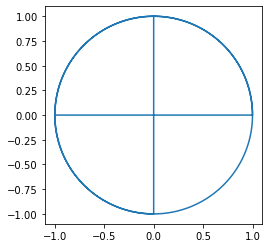

In [7]:
t = np.linspace(0, 3.5 * np.pi , num=300)
l = np.linspace(-1, 1, num=10)
z = np.zeros_like(l)
circle = np.array(
    [
        np.concatenate([l, np.cos(t), z]),
        np.concatenate([z, np.sin(t), l])
    ]
)

show_circle(circle) 

Luego, al utilizar `A` como un operador lineal, es decir $A C$.

In [8]:
print(A)

[[0.1 0.5]
 [0.4 0.8]]


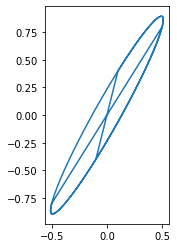

In [9]:
show_circle(A @ circle)

#### Ejercicio 2

(5 puntos)

* Obtén la descomposición SVD de $A$, tal que $A = U \Sigma V^H$.
* Grafica el resultado de aplicar los siguientes operadores lineales a la circunferencia unitaria:
    - $U$
    - $\Sigma$
    - $V^H$
* Explica con tus palabras la transformación de la circunferencia unitaria luego de aplicar los operadores anteriores, ¿Influye en algo que $U$ y $V$ sean unitarias?
* ¿Qué relación tienen los operadores anteriores respecto a aplicar el operador lineal $A$?

In [10]:
u, s, vh = svd(A)
svd_validation(A)

True

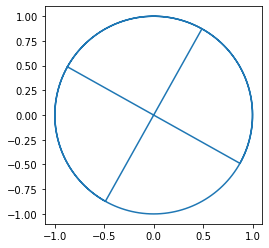

In [11]:
show_circle(u@circle)

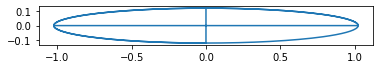

In [12]:
show_circle(np.diag(s)@circle)

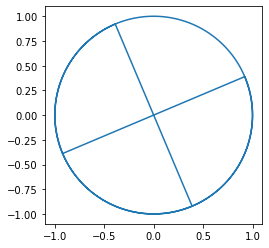

In [13]:
show_circle(vh@circle)

__Respuesta:__ Al aplicar U y V a la circunferencia unitaria, se observa que la circunferencia solo rota, pero mantiene constante e iguales su radio. Esto se puede explicar debido a que U y V son unitarias, ya que de no ser así, también cambiaría su forma a una elipse. Al aplicar S a la circunferencia unitaria, se observa que mantiene su dirección (no rota), pero si cambia su forma a una elipse marcada.

__Respuesta:__ En este caso, los operadores U, V y S (sigma) están descompuestos, por lo que cada una de estas operaciones se visualiza "por separado". Al juntarlas, como ocurre con el operador A (que no ha pasado por el proceso de descomposición), se aplican las rotaciones y el cambio de forma de una sola vez.

### Aproximación Rango Menor

Existen muchas maneras de expresar una matriz como una suma de matrices de menor rango, por ejemplo:

$$
\begin{bmatrix}
a & b \\
c & d 
\end{bmatrix}
= 
\begin{bmatrix}
a & 0 \\ 0 & 0  
\end{bmatrix}
+ 
\begin{bmatrix}
0 & b \\ 0 & 0 
\end{bmatrix}
+ 
\begin{bmatrix}
0 & 0 \\ c & 0 
\end{bmatrix}
+
\begin{bmatrix}
0 & 0 \\ 0 & d 
\end{bmatrix}.
$$

Cada una de las matrices del lado derecho pueden tener rango a lo más 1.

En el primer ejercicio demostraste que la descomposición SVD $A$ puede ser expresada como una suma de matrices. Sin embargo, cada una de estas matrices tiene rango 1! Esto pues cada una de estas matrices se forma a partir de los productos externos entre los vectores $u_l$ y $v_l$, es decir $u_l v_l^H$.

La pregunta natural es:

_¿Cómo obtener una buena aproximación de $A$ utilizando matrices de rango muy bajo?_

Bueno, aquí va un teorema.

__Teorema 1:__



Sea $A$ matriz de tamaño $m \times n$. Para cualquier $0 \le \ell \le r = \text{rank}(A)$, se define la matriz 
$$
A_\ell = \sum_{j=1}^{\ell} \sigma_j u_j v_j^*,
$$
utilizando los valores singulares $\sigma_j$ y los vectores singulares (izquierdos y derechos) $u_j, v_j$ de $A$,  i.e., $A_\ell$ se compone de la suma de los primeros $\ell$ términos de la descomposición SVD escrita como una suma de productor externos. Luego, el mínimo de  $\| A - B \|_F$ sobre todas las matrices $B$ de tamaño $m \times n$ y rango no mayor a $\ell$ se obtiene por $\| A - A_\ell \|_F$ y el mínimo que se alcanza es  $(\sigma_{\ell+1}^2 + \cdots + \sigma_r^2)^{1/2}$.

Recuerda que la norma de Frobenius se define como

$$
\| A \|_F = \bigg( \sum_{i, j} |A_{ij}|^2 \bigg)^{1/2}.
$$

Motivaremos el ejercicio utilizando imágenes en escala de grises ya que es muy intuitivo, fácil de ver y se puede considerar que la imagen es una matriz.

In [14]:
from pathlib import Path
from PIL import Image

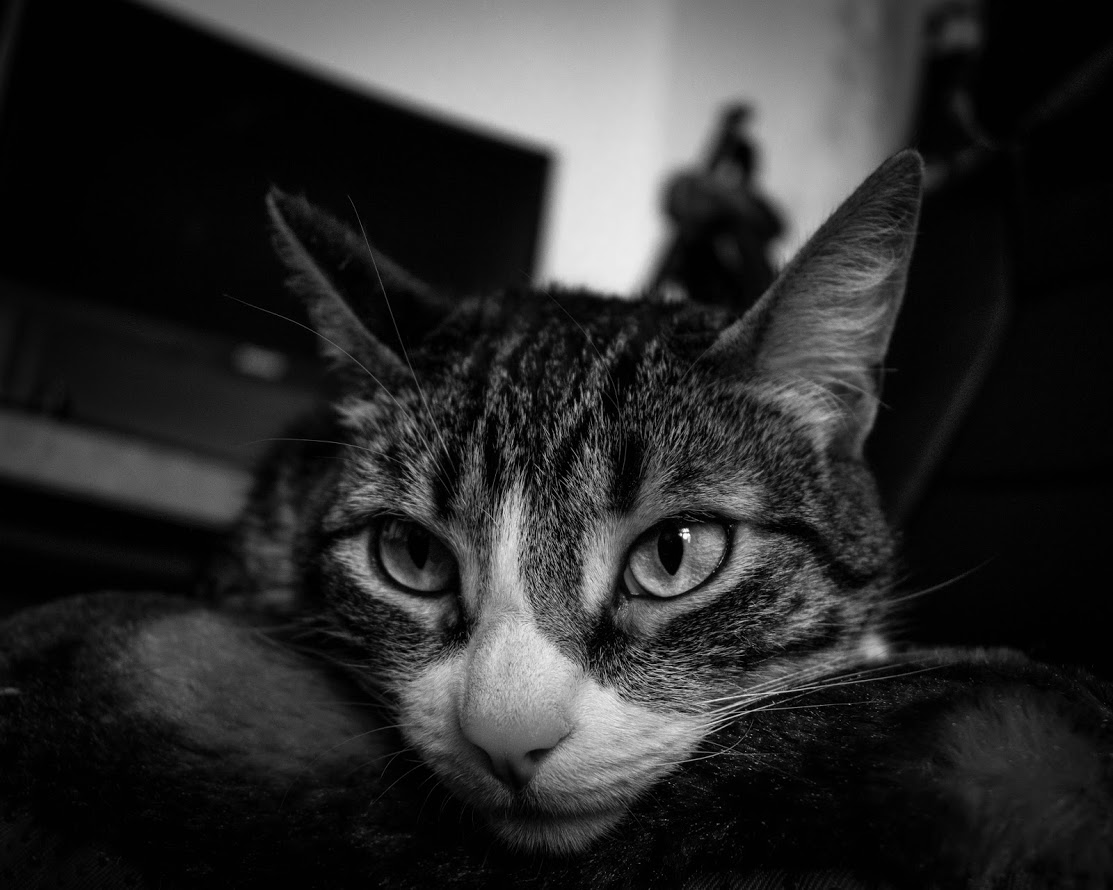

In [15]:
# Utilizaremos una foto de una de mis gatitas c:
cat = Image.open(Path().resolve().parent / "images" / "coyoya.jpg").convert('L')
cat

Para convertirla en un numpy array basta con:

In [16]:
cat_np = np.array(cat)
print(cat_np.shape)

(890, 1113)


#### Ejercicio 3

(10 puntos)

Define la función `low_rank_svd_approximation` tal que:

* Los inputs sean $A$ (la imagen convertida un `np.array` de dimensión 2) y un valor entero $\ell$ que represente la cantidad de términos a sumar de la despomposición SVD (respecto al teorema anterior).
* Retorne la aproximación $A_\ell$
* Imprima el error de la aproximación utilizando la norma de Frobenius.

Luego prueba tu función y observa la imagen con distintos valores de $\ell$.

In [17]:
def low_rank_svd_approximation(A, l):
    u, s, vh = svd(A)
    m, n = A.shape
    A_l = np.zeros(shape=(m,n))
    for i in range(l):
        A_l += s[i]*np.outer(u[:,i],vh[i,:])
    A_F= np.sqrt(np.sum(np.abs(A - A_l)**2))
    print(f"La norma de Frobenius es: {A_F}")
    return A_l

La norma de Frobenius es: 16045.719759793661


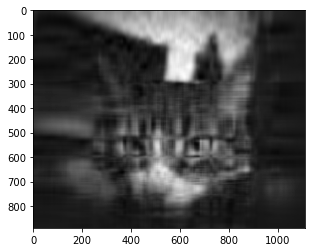

In [18]:
cat10 = low_rank_svd_approximation(cat_np, l=10)
plt.imshow(cat10, cmap='gray');

La norma de Frobenius es: 8144.192604052271


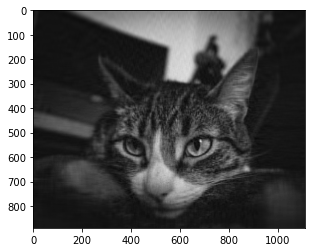

In [19]:
cat50 = low_rank_svd_approximation(cat_np, l=50)
plt.imshow(cat50, cmap='gray');

#### Ejercicio 4

(15 puntos)

En el ejercicio anterior fijaste un rango máximo y obtuviste la aproximación, sin embargo, en otro contexto, te gustaría fijar una tolerancia de error y obtener la mejor aproximación.

Define la función `low_rank_svd_tol_approximation` tal que:

* Los inputs sean $A$ (la imagen convertida un `np.array` de dimensión 2) y $\varepsilon$ (tolerancia relativa) tal que
$$
\left(\frac{\sigma_{\ell+1}^2 + \cdots + \sigma_r^2}{\sigma_1^2 + \cdots + \sigma_r^2}\right)^{1/2} \le \varepsilon.
$$
* Imprima $\ell(\varepsilon)$, es decir, el mayor rango aproximado de $A$ tal que el error de aproximación sea a lo más $\varepsilon$.
* Retorne la aproximación $A_{\ell(\varepsilon)}$

Luego prueba tu función y observa la imagen con distintos valores de $\varepsilon$.

In [20]:
def low_rank_svd_tol_approximation(A, tol):
    u, s, vh = svd(A)
    m, n = A.shape
    A_l = np.zeros(shape=(m,n))
    l = 0
    for k in range(m):
        for i in range(l):
            A_l += s[i]*np.outer(u[:,i],vh[i,:])
        A_F = np.sqrt(np.sum(np.abs(A - A_l)**2))
        A_FA = np.sqrt(np.sum(np.abs(A)**2))
        if (A_FA/A_F) <= tol:
            print(f"el valor de l(e) es: {l}")
            return A_l
        else:
            l += 1

el valor de l(e) es: 3


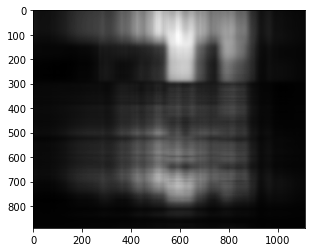

In [21]:
cat_e1 = low_rank_svd_tol_approximation(cat_np, tol=1.e-1)
plt.imshow(cat_e1, cmap='gray');

el valor de l(e) es: 14


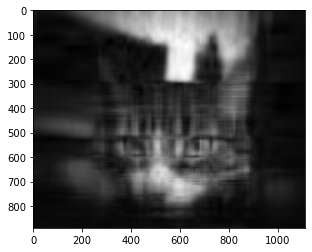

In [22]:
cat_e2 = low_rank_svd_tol_approximation(cat_np, tol=1.e-2)
plt.imshow(cat_e2, cmap='gray');

#### Ejercicio 5

(5 puntos)

Utilizando alguna imagen de tu preferencia utiliza ambas

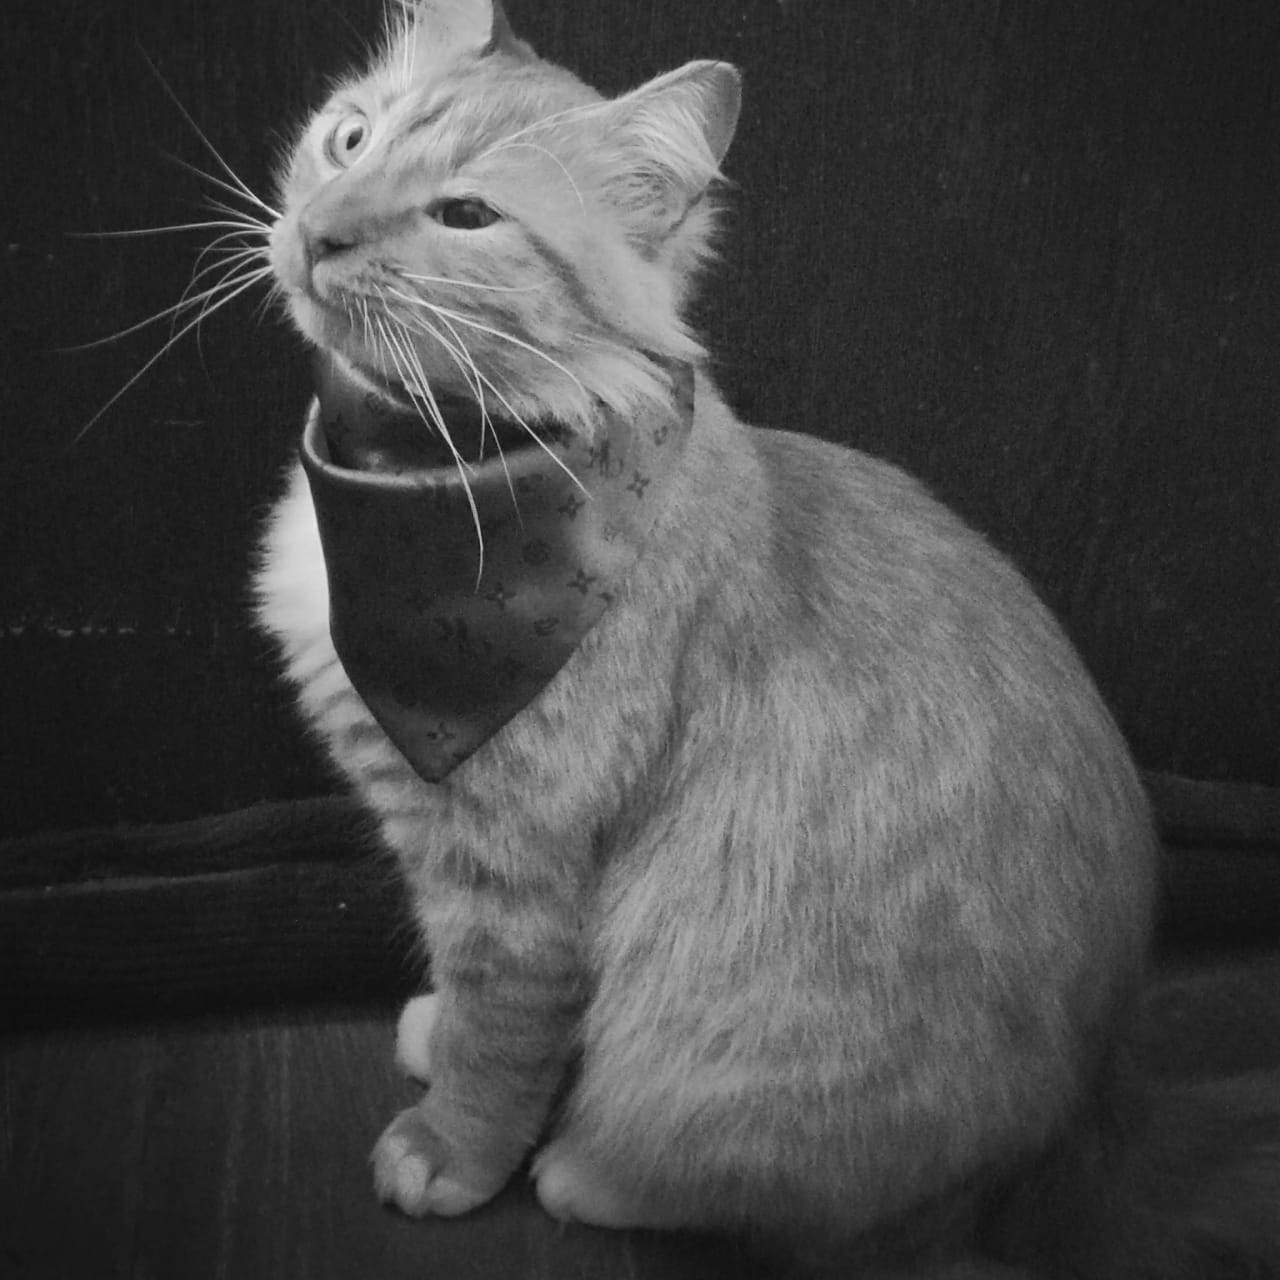

In [23]:
your_img_name = "catalino"
your_img = Image.open(Path().resolve().parent / "images" / "catalino.jpeg" ).convert('L')
your_img

In [24]:
your_img_np = np.array(your_img)

La norma de Frobenius es: 15109.020560763804


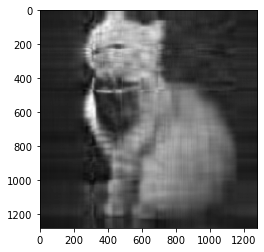

In [25]:
your_img10 = low_rank_svd_approximation(your_img_np, l=10)
plt.imshow(your_img10, cmap='gray');

La norma de Frobenius es: 7225.015482046082


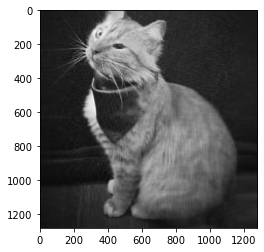

In [26]:
your_img50 = low_rank_svd_approximation(your_img_np, l=50)
plt.imshow(your_img50, cmap='gray');

el valor de l(e) es: 3


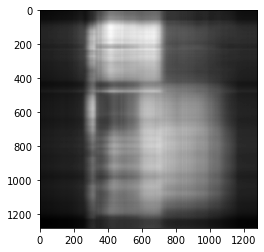

In [27]:
your_img_e1 = low_rank_svd_tol_approximation(your_img_np, tol=1.e-1)
plt.imshow(your_img_e1, cmap='gray');

el valor de l(e) es: 14


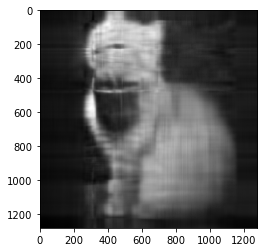

In [28]:
your_img_e2 = low_rank_svd_tol_approximation(your_img_np, tol=1.e-2)
plt.imshow(your_img_e2, cmap='gray');

__Pregunta:__ ¿Será una manera útil de comprimir imágenes en el disco duro o crees que existen otras formas más eficientes?

__Respuesta:__

## COVID-19 en Chile

### *¿Cuál es el panorama actual de Chile frente a la pandemia de COVID-19?*

In [29]:
import pandas as pd
from datetime import date

#### Ejercicio 6

(25 puntos)

Se ha hablado mucho últimamente que Magallanes es una región crítica en cuanto a casos confirmados de COVID-19. Este ejercicio busca constatar a través de los datos aquellas aseveraciones con un indicador siemple pero que parece ser efectivo que bautizaremos como _tasa promedio de casos nuevos_, definida como el promedio de nuevos casos cada cien mil habitantes para un umbral de tiempo determinado.

Utiliza el dataframe `covid_comunas` para obtener el dataframe `covid_tasa_promedio_nuevos` que posee las columnas `region`, `comuna`, `promedio_casos_nuevos`, `poblacion` y `tasa_promedio_casos_nuevos` considerando el umbral de tiempo es entre el 1 y 11 de octubre del año 2020.

Para ello considera lo siguiente:

* No consideres registros que tengan código de comuna nulo.
* Rellena todos los registros de casos totales nulos por cero.
* Considera utilizar `melt` u otro método similar para apilar las columnas de fechas particulares en solo dos columnas, `fecha` y `casos_totales`.
* Define la columna `casos_nuevos` como la diferencia entre dos registros consecutivos para una misma comuna
    - No olvides ordenar por fecha
    - El primer registro de cada comuna debe ser nulo.
    - Considera utilizar el método `transform`.
* Filtra por el umbral de tiempo dado.
* Agrupa por región-comuna y luego define la columna `promedio_casos_nuevos` como el promedio de la columna `casos_nuevos`.
* En caso que hayas _dropeado_ la columna `poblacion` la puedes volver a agregar utilizando `merge` u otro método apropiado. Se asume que la población no cambia durante el tiempo.
* Asigna la columna `tasa_promedio_casos_nuevos` como la cantidad promedio de casos nuevos por cada cien mil habitantes.
* Ordena el dataframe resultante por `tasa_promedio_casos_nuevos` de manera descendente.

Información del dataset: [aquí](https://github.com/MinCiencia/Datos-COVID19/tree/master/output/producto1).

In [30]:
covid_comunas = (
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto1/Covid-19.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
)
covid_comunas.head()

,region,codigo_region,comuna,codigo_comuna,poblacion,2020-03-30,2020-04-01,2020-04-03,2020-04-06,2020-04-08,...,2020-10-02,2020-10-05,2020-10-09,2020-10-12,2020-10-16,2020-10-19,2020-10-24,2020-10-26,2020-10-30,tasa
0,Arica y Parinacota,15,Arica,15101.0,247552.0,6.0,6.0,12.0,41.0,63.0,...,8597.0,8772.0,8996.0,9138.0,9343.0,9472.0,9679.0,9763.0,9888.0,3994.3
1,Arica y Parinacota,15,Camarones,15102.0,1233.0,0.0,0.0,0.0,0.0,0.0,...,27.0,28.0,28.0,28.0,28.0,28.0,28.0,28.0,28.0,2270.9
2,Arica y Parinacota,15,General Lagos,15202.0,810.0,0.0,0.0,0.0,0.0,0.0,...,64.0,64.0,64.0,64.0,64.0,64.0,64.0,64.0,64.0,7901.2
3,Arica y Parinacota,15,Putre,15201.0,2515.0,0.0,0.0,0.0,0.0,0.0,...,67.0,70.0,70.0,70.0,70.0,70.0,71.0,72.0,72.0,2862.8
4,Arica y Parinacota,15,Desconocido Arica y Parinacota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,37.0,36.0,36.0,40.0,43.0,43.0,43.0,44.0,36.0,NaN


In [31]:
start_date = "2020-10-1"
end_date = "2020-10-11"

In [32]:
#Trabajo con datos nulos
covid_comunas_nonull= (
    covid_comunas.dropna(subset=["codigo_comuna"])
    .drop(columns="poblacion")
    .fillna(0)
)

#Hago el melt
covid_comunas_melted=(
    covid_comunas_nonull.melt(id_vars=covid_comunas_nonull.columns[0:4]
                              ,value_vars=covid_comunas_nonull.columns[4:-2]
                              ,var_name="fecha"
                              ,value_name="casos_totales")
)

#columna fechas a elementos tipo fecha
covid_comunas_melted["fecha"]=pd.to_datetime(covid_comunas_melted["fecha"],format='%Y-%m-%d')
#ordeno por fecha
covid_comunas_melted.sort_values(by="fecha") 
#creo nueva columna casos_nuevos
covid_comunas_diff=(covid_comunas_melted
                       .assign(casos_nuevos=lambda df: df.groupby("comuna")["casos_totales"]
                               .transform(lambda x: x.diff().fillna(0))
                     )
                     )

#filtro entre fechas
covid_comunas_date = covid_comunas_diff[(covid_comunas_diff["fecha"]>=start_date)&(covid_comunas_diff["fecha"]<=end_date)]

#defino columna promedio_casos_nuevos
covid_comunas_promedio=(covid_comunas_date
                        .assign(promedio_casos_nuevos=lambda df: df.groupby(["region","comuna"])["casos_nuevos"]
                                .transform(lambda x: x.mean()))
                       )

#se agrega nuevamente la columna población
covid_comunas_con_poblacion=(covid_comunas_promedio
                             .merge(covid_comunas.drop(columns=(covid_comunas.columns[5:])),how="left")
                            )

#se asigna la columna tasa_promedio_casos_nuevos y se dropean las que no se necesiten
covid_tasa_promedio_nuevos = (covid_comunas_con_poblacion
                              .assign(tasa_promedio_casos_nuevos=lambda x: x
                                      .apply(lambda row: row["promedio_casos_nuevos"]*100000/(row["poblacion"]),axis=1))
                              .drop(columns=["codigo_comuna","codigo_region"])
                              .sort_values(by="tasa_promedio_casos_nuevos",ascending=False)
                             )

In [33]:
covid_tasa_promedio_nuevos.head()

,region,comuna,fecha,casos_totales,casos_nuevos,promedio_casos_nuevos,poblacion,tasa_promedio_casos_nuevos
344,Magallanes,Timaukel,2020-10-02,2.0,0.0,3.333333,282.0,1182.033097
1036,Magallanes,Timaukel,2020-10-09,12.0,4.0,3.333333,282.0,1182.033097
690,Magallanes,Timaukel,2020-10-05,8.0,6.0,3.333333,282.0,1182.033097
1035,Magallanes,San Gregorio,2020-10-09,14.0,5.0,4.000000,681.0,587.371512
343,Magallanes,San Gregorio,2020-10-02,9.0,7.0,4.000000,681.0,587.371512


__Pregunta:__ ¿Qué puedes observar respecto a las comunas que tienen mayor Tasa Promedio de Casos Nuevos?

__Respuesta:__ Las  comunas con mayor Tasa de promedio de casos nuevos están ubicadas en la región de Magallanes

#### Ejercicio 7

(15 puntos)

¿Hay correlación entre la cantidad de exámenes PCR y los casos confirmados en cada comuna?


Información del dataset: [aquí](https://github.com/MinCiencia/Datos-COVID19/tree/master/output/producto7).

In [34]:
covid_pcr = (
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto7/PCR.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
)
covid_pcr.head()

,region,codigo_region,poblacion,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,...,2020-10-22,2020-10-23,2020-10-24,2020-10-25,2020-10-26,2020-10-27,2020-10-28,2020-10-29,2020-10-30,2020-10-31
0,Arica y Parinacota,15,252110,70.0,NaN,93.0,103.0,NaN,93.0,24.0,...,728,794,738,737,832,542,343,706,777,1058
1,Tarapacá,1,382773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,648,972,932,1046,1044,796,714,694,946,1752
2,Antofagasta,2,691854,182.0,128.0,107.0,175.0,103.0,95.0,117.0,...,1229,1571,1890,2239,3825,1749,1354,1858,1238,1906
3,Atacama,3,314709,57.0,52.0,60.0,25.0,20.0,22.0,25.0,...,319,792,838,1020,939,563,340,237,838,863
4,Coquimbo,4,836096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,823,1008,1128,1057,1026,473,1503,1050,1125,1351


Obtén el dataframe `covid_pcr_melt` utilizando `covid_pcr` tal que:

* Tenga las columnas `region`, `fecha` y `nm_pcr`.
* `fecha` sea del tipo `datetime64`.
* `nm_pcr` sea el número de PCR realizados y rellena los valores nulos por cero.

In [35]:
covid_pcr_melt = (
    covid_pcr.melt(id_vars=covid_pcr.columns[0:1]
                   ,value_vars=covid_pcr.columns[3:]
                   ,var_name="fecha"
                   ,value_name="nm_pcr").fillna(0)
)
covid_pcr_melt["fecha"]=pd.to_datetime(covid_pcr_melt["fecha"],format='%Y-%m-%d')
covid_pcr_melt

,region,fecha,nm_pcr
0,Arica y Parinacota,2020-04-09,70.0
1,Tarapacá,2020-04-09,0.0
2,Antofagasta,2020-04-09,182.0
3,Atacama,2020-04-09,57.0
4,Coquimbo,2020-04-09,0.0
...,...,...,...
3291,Araucanía,2020-10-31,1716.0
3292,Los Ríos,2020-10-31,1012.0
3293,Los Lagos,2020-10-31,3670.0
3294,Aysén,2020-10-31,235.0


Obtén el dataframe `covid_casos_melt` utilizando `covid_comunas` tal que:

* Tenga las columnas `region`, `fecha` y `casos_totales`.
* Rellena los valores nulos con cero.
* `fecha` sea del tipo `datetime64`.
* `casos_totales` sea la cantidad de casos totales por región y fecha.

In [36]:
covid_casos_melt = (
(
    covid_comunas.melt(id_vars=covid_comunas.columns[0:1]
                   ,value_vars=covid_comunas.columns[5:-1]
                   ,var_name="fecha"
                   ,value_name="casos_totales").fillna(0)
).groupby(["region","fecha"])
    .agg(casos_totales=("casos_totales","sum"))
    .reset_index()
)
covid_casos_melt["fecha"]=pd.to_datetime(covid_casos_melt["fecha"],format='%Y-%m-%d')
covid_casos_melt

,region,fecha,casos_totales
0,Antofagasta,2020-03-30,29.0
1,Antofagasta,2020-04-01,32.0
2,Antofagasta,2020-04-03,49.0
3,Antofagasta,2020-04-06,65.0
4,Antofagasta,2020-04-08,72.0
...,...,...,...
1019,Ñuble,2020-10-16,9129.0
1020,Ñuble,2020-10-19,9270.0
1021,Ñuble,2020-10-24,9534.0
1022,Ñuble,2020-10-26,9634.0


Finalmente, obtén la serie `covid_corr_casos_pcr` de la siguiente manera:

* Une `covid_pcr_melt` y `covid_casos_melt` a través de _merge_, utilizando la región y la fecha como llave, además conserva todos los registros (tanto derecha como izquierda).
* Rellena los números de PCR con el valor cero.
* Haz un `ffill` a los casos totales.
* Agrupa por región y obtén la correlación entre `nm_pcr` y `casos_totales`.
* Ordena los valores ascendentemente.

In [37]:
covid_corr_casos_pcr = (
    pd.merge(covid_pcr_melt,covid_casos_melt,how="outer",on=["region","fecha"])
).sort_values(by=["region","fecha"]).reset_index()

covid_corr_casos_pcr["nm_pcr"]=covid_corr_casos_pcr["nm_pcr"].fillna(0)
covid_corr_casos_pcr["casos_totales"]=covid_corr_casos_pcr["casos_totales"].ffill()
covid_corr_casos_pcr.groupby("region")[["nm_pcr","casos_totales"]].corr().iloc[0::2][['casos_totales']].sort_values(by="casos_totales",ascending=True)

,,casos_totales
region,,
Metropolitana,nm_pcr,0.519206
Magallanes,nm_pcr,0.661299
Aysén,nm_pcr,0.711009
Atacama,nm_pcr,0.723395
Antofagasta,nm_pcr,0.770027
Tarapacá,nm_pcr,0.795106
Ñuble,nm_pcr,0.795455
Los Lagos,nm_pcr,0.811974
Biobío,nm_pcr,0.813270


__Pregunta:__ ¿Qué puedes inferir del análisis anterior? ¿Se condice con tu sentido común?

__Respuesta:__ La región Metropolitana y la región de Magallanes poseen baja correlación entre número de pcr y casos totales, lo cual se contradice al sentido común. Uno esperaría que la relación fuese mayor, debido a que han sido dos regiones críticas en la pandemia del COVID-19. El bajo valor puede deberse a las campañas de detección, en donde se realizan bastantes exámenes para encontrar casos positivos. En esta búsqueda, la cantidad de exámenes es mucho mayor a los contagiados que encuentran, haciendo bajar esta relación.

#### Ejercicio 8

(10 puntos)

Propón y responde una pregunta que puedas resolver analizando dos o más conjuntos de datos del repositorio oficial de datos COVID-19 del Ministerio de Ciencia, Tecnología e Innovación de Chile ([link](https://github.com/MinCiencia/Datos-COVID19)).

Se evaluará originalidad, análisis de datos, calidad de la pregunta y respuesta.

__Pregunta:__ En el mes de mayo del 2020, se iniciaron las masivas cuarentenas en la Región Metropolitana, en el marco de lo que el ex-ministro de salud Jaime Mañalich denominó "La batalla de Santiago". Luego de varios meses, en agosto, gran cantidad de comunas han pasado a fase de transición saliendo de la cuarentena estricta. Surge la duda sobre los motivos que impulsaron el inicio y fin de la cuarentena. Para ver si se justifican estas decisiones, analiza la positividad diaria y el porcentaje de camas UCI disponibles al mes de inicio y fin de la cuarentena, e identifica el día en donde estos parámetros fueron críticos (Asumir que la positividad nacional representa la positividad de la región Metropolitana). Finalmente concluye si la entrada y salida de cuarentena en la región Metropolitana se encuentra justificada.

Cargamos el archivo de datos de camas UCI

In [38]:
# Cargamos el archivo de datos
covid_uci = (
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto58/Camas_UCI_diarias.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
)
covid_uci.head()

,region,serie,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-18,2020-04-19,2020-04-20,2020-04-21,...,2020-10-19,2020-10-20,2020-10-21,2020-10-22,2020-10-23,2020-10-24,2020-10-25,2020-10-26,2020-10-27,2020-10-28
0,Arica y Parinacota,Camas UCI habilitadas,9,9,11,21,21,21,21,21,...,30,30,30,30,30,30,27,27,27,27
1,Tarapacá,Camas UCI habilitadas,13,13,13,13,15,15,15,11,...,24,24,24,24,24,24,24,24,24,24
2,Antofagasta,Camas UCI habilitadas,54,54,60,60,68,68,73,73,...,112,112,111,112,113,112,113,111,111,111
3,Atacama,Camas UCI habilitadas,11,11,11,11,11,11,11,11,...,19,19,20,20,20,20,20,20,20,21
4,Coquimbo,Camas UCI habilitadas,46,34,43,50,50,50,50,50,...,62,63,63,63,63,63,63,63,63,54


Definimos la fecha de inicio y la fecha final de análisis, de acuerdo a las cuarentenas

In [39]:
fecha_inicio="2020-05-05"
fecha_final="2020-08-28"

Filtramos los datos a la región metropolitana y hacemos melt para tener las fechas como filas

In [40]:
covid_uci_metropolitana = covid_uci[covid_uci["region"]=="Metropolitana"].melt(id_vars=covid_uci.columns[0:2],
                                                    value_vars=covid_uci.columns[2:],
                                                    var_name="fecha",
                                                    value_name="cantidad_de_camas")

# Llevamos la columna fecha a elementos tipo fecha
covid_uci_metropolitana["fecha"]=pd.to_datetime(covid_uci_metropolitana["fecha"],format='%Y-%m-%d')

covid_uci_metropolitana.head()

,region,serie,fecha,cantidad_de_camas
0,Metropolitana,Camas UCI habilitadas,2020-04-14,793
1,Metropolitana,Camas UCI ocupadas COVID-19,2020-04-14,190
2,Metropolitana,Camas UCI ocupadas no COVID-19,2020-04-14,306
3,Metropolitana,Camas UCI ocupadas,2020-04-14,496
4,Metropolitana,Camas UCI habilitadas,2020-04-15,808


Pivoteamos la columna serie y la renombramos

In [41]:
covid_uci_pivot = (
    covid_uci_metropolitana
    .pivot_table(index=["region","fecha"],columns="serie",values="cantidad_de_camas")
    .reset_index()
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
)
covid_uci_pivot.head()

serie,region,fecha,camas_uci_habilitadas,camas_uci_ocupadas,camas_uci_ocupadas_covid-19,camas_uci_ocupadas_no_covid-19
0,Metropolitana,2020-04-14,793,496,190,306
1,Metropolitana,2020-04-15,808,510,198,312
2,Metropolitana,2020-04-16,808,519,196,323
3,Metropolitana,2020-04-17,808,521,202,319
4,Metropolitana,2020-04-18,818,527,181,346


Filtramos entre las fechas correspondientes

In [42]:
covid_uci_fechas = covid_uci_pivot[(covid_uci_pivot["fecha"]>=fecha_inicio)&(covid_uci_pivot["fecha"]<=fecha_final)]
covid_uci_fechas.head()

serie,region,fecha,camas_uci_habilitadas,camas_uci_ocupadas,camas_uci_ocupadas_covid-19,camas_uci_ocupadas_no_covid-19
21,Metropolitana,2020-05-05,1016,679,314,365
22,Metropolitana,2020-05-06,1008,689,340,349
23,Metropolitana,2020-05-07,999,690,348,342
24,Metropolitana,2020-05-08,986,709,366,343
25,Metropolitana,2020-05-09,987,736,394,342


Agregamos la columna porcentaje_covid que refleja el porcentaje de camas ocupadas por pacientes covid con respecto al total y la columna camas_disponibles que refleja la cantidad de camas habilitadas menos las ocupadas
Dropeamos las demás columnas de camas y solo nos quedamos con las dos que añadimos

In [43]:

covid_uci_porcentaje = ((covid_uci_fechas.assign(porcentaje_covid=lambda x: x
                                      .apply(lambda row: row["camas_uci_ocupadas_covid-19"]*100/(row["camas_uci_habilitadas"]),axis=1))
                       ).assign(camas_disponibles=lambda x: x.apply(lambda row: row["camas_uci_habilitadas"]-row["camas_uci_ocupadas"],axis=1)))

covid_uci_porcentaje=covid_uci_porcentaje.drop(columns=covid_uci_porcentaje.columns[2:6])
covid_uci_porcentaje.head()

serie,region,fecha,porcentaje_covid,camas_disponibles
21,Metropolitana,2020-05-05,30.905512,337
22,Metropolitana,2020-05-06,33.730159,319
23,Metropolitana,2020-05-07,34.834835,309
24,Metropolitana,2020-05-08,37.119675,277
25,Metropolitana,2020-05-09,39.918946,251


Cargamos el archivo de datos de positividad

In [44]:
covid_positividad = (
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto49/Positividad_Diaria_Media.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
)

covid_positividad=covid_positividad.rename(columns={"fecha":"serie"})

covid_positividad.head()

,serie,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02,...,2020-10-22,2020-10-23,2020-10-24,2020-10-25,2020-10-26,2020-10-27,2020-10-28,2020-10-29,2020-10-30,2020-10-31
0,pcr,3290.0000,4886.0000,7387.0000,3534.0000,1777.0000,3680.0000,3046.0000,2898.0000,2685.0000,...,31734.0000,37359.0000,37796.0000,38473.0000,37832.0000,20012.0000,21822.0000,33406.0000,36880.0000,39258.0000
1,casos,220.0000,164.0000,304.0000,299.0000,230.0000,310.0000,289.0000,293.0000,373.0000,...,1495.0000,1773.0000,1631.0000,1540.0000,1505.0000,922.0000,1004.0000,1519.0000,1529.0000,1686.0000
2,positividad,0.0669,0.0336,0.0412,0.0846,0.1294,0.0842,0.0949,0.1011,0.1389,...,0.0471,0.0475,0.0432,0.0400,0.0398,0.0461,0.0460,0.0455,0.0415,0.0429
3,mediamovil_positividad,NaN,NaN,NaN,NaN,NaN,NaN,0.0764,0.0813,0.0963,...,0.0495,0.0486,0.0477,0.0466,0.0459,0.0464,0.0442,0.0440,0.0432,0.0431


Hacemos el melt, el pivot, filtramos entre fechas y dropeamos las columnas que no necesitamos.

In [45]:
covid_positividad_melt = (
    covid_positividad.melt(id_vars=covid_positividad.columns[0],
                           value_vars=covid_positividad.columns[1:],
                           var_name="fecha",
                           value_name="valor")
)

covid_positividad_pivot = (covid_positividad_melt.pivot_table(index="fecha",columns="serie",values="valor")).reset_index()

covid_positividad_fechas = covid_positividad_pivot[(covid_positividad_pivot["fecha"]>=fecha_inicio)&(covid_positividad_pivot["fecha"]<=fecha_final)]

covid_positividad_drop = covid_positividad_fechas.drop(columns=covid_positividad_fechas.columns[1:4])

covid_positividad_drop["fecha"]=pd.to_datetime(covid_positividad_drop["fecha"])
covid_positividad_drop.head()

serie,fecha,positividad
41,2020-05-05,0.1724
42,2020-05-06,0.1031
43,2020-05-07,0.1265
44,2020-05-08,0.1185
45,2020-05-09,0.1044


Finalmente, hacemos un inner merge utilizando la fecha como key

In [46]:
covid_analisis = pd.merge(covid_positividad_drop,covid_uci_porcentaje,how="inner",on="fecha").drop(columns="region")
covid_analisis.head()

serie,fecha,positividad,porcentaje_covid,camas_disponibles
0,2020-05-05,0.1724,30.905512,337
1,2020-05-06,0.1031,33.730159,319
2,2020-05-07,0.1265,34.834835,309
3,2020-05-08,0.1185,37.119675,277
4,2020-05-09,0.1044,39.918946,251


Finalmente, analizamos los datos obtenidos

In [47]:
# Analizamos los datos:
print(f"La positividad al inicio de las grandes cuarentenas fue de {covid_analisis.loc[0,'positividad']} con fecha {covid_analisis.min()['fecha']}")
print(f"La máxima positividad fue de {covid_analisis['positividad'].max()} en la fecha de {covid_analisis.loc[covid_analisis['positividad'].idxmax()]['fecha']}")
print(f"La mínima positividad fue de {covid_analisis['positividad'].min()} en la fecha de {covid_analisis.loc[covid_analisis['positividad'].idxmin()]['fecha']}")
print(" ")
print(f"El porcentaje de camas UCI utilizadas por pacientes COVID al inicio de las grandes cuarentenas fue de {covid_analisis.loc[0,'porcentaje_covid']} con fecha {covid_analisis.min()['fecha']}")
print(f"El porcentaje máximo de camas UCI utilizadas por pacientes COVID fue de {covid_analisis['porcentaje_covid'].max()} en la fecha de {covid_analisis.loc[covid_analisis['porcentaje_covid'].idxmax()]['fecha']}")
print(f"El porcentaje camas UCI utilizadas por pacientes COVID a finales de agosto fue de {covid_analisis.loc[covid_analisis['fecha']=='2020-08-28','porcentaje_covid'].iloc[0]}")
print(" ")
print(f"Las camas UCI disponibles al comienzo de la cuarentena eran: {covid_analisis.loc[0,'camas_disponibles']}")
print(f"La menor cantidad de camas UCI disponibles fue de: {covid_analisis['camas_disponibles'].min()}, con fecha {covid_analisis.loc[covid_analisis['camas_disponibles'].idxmin()]['fecha']}")
print(f"Las camas UCI disponibles a finales de agosto fue de: {covid_analisis.loc[covid_analisis['fecha']=='2020-08-28','camas_disponibles'].iloc[0]}")


La positividad al inicio de las grandes cuarentenas fue de 0.1724 con fecha 2020-05-05 00:00:00
La máxima positividad fue de 0.3963 en la fecha de 2020-06-10 00:00:00
La mínima positividad fue de 0.0574 en la fecha de 2020-08-25 00:00:00
 
El porcentaje de camas UCI utilizadas por pacientes COVID al inicio de las grandes cuarentenas fue de 30.905511811023622 con fecha 2020-05-05 00:00:00
El porcentaje máximo de camas UCI utilizadas por pacientes COVID fue de 81.3262599469496 en la fecha de 2020-06-28 00:00:00
El porcentaje camas UCI utilizadas por pacientes COVID a finales de agosto fue de 37.98449612403101
 
Las camas UCI disponibles al comienzo de la cuarentena eran: 337
La menor cantidad de camas UCI disponibles fue de: 20, con fecha 2020-06-06 00:00:00
Las camas UCI disponibles a finales de agosto fue de: 248


__Respuesta:__ Se observa que las condiciones que dieron origen a las cuarentenas en la región Metropolitana fueron críticas durante el periodo de tiempo en que estas duraron. Con respecto a la positividad, se comenzaron las cuarentenas con un 17.24%, alcanzó un crítico de 39.63% y cuando comenzaron a terminar, se llegó a un 5.74%, por lo que se justifica el inicio y fin de la cuarentena si analizamos este parámetro. 

Con respecto a las camas UCI disponibles, se observa que al comienzo de las cuarentenas, habían 337 camas, y al final, 248, por lo que este parámetro mejoró. Se debe observar que durante la cuarentena, se alcanzó un valor mínimo y muy crítico de solo 20 camas UCI disponibles. 

Las camas UCI no solo son utilizadas por pacientes covid, pero estimar el porcentaje de pacientes covid que están utilizando las camas UCI nos permite saber que tan crítica es la situación. Al comienzo de la cuarentena, el 30.91% de camas UCI era ocupada por pacientes COVID. Durante las cuarentenas, se alcanzó un valor crítico de 81.33%, mientras que a finales de la cuarentena (mes de agosto), el porcentaje fue de 37.98%. Si bien el valor es mayor al inicio de la cuarentena, es cercano y es mucho menor que el valor crítico alcanzado.

Con la información analizada, se concluye que las medidas de cuarentena fueron aplicadas justo a tiempo, y existe justificación para su término y su inicio.

#### Ejercicio 9

(10 puntos)

Propón y responde una pregunta que puedas resolver analizando dos o más conjuntos de datos del repositorio oficial de datos COVID-19 del Ministerio de Ciencia, Tecnología e Innovación de Chile ([link](https://github.com/MinCiencia/Datos-COVID19)). Sin utilizar ninguno de los datasets que hayas utilizado en el ejercicio 8.

Se evaluará originalidad, análisis de datos, calidad de la pregunta y respuesta.

__Pregunta:__ Médicos alrededor del mundo aseguran que la población de riesgo frente a la pandemia del COVID-19 es la tercera edad. Esto suena lógico desde el punto de vista biológico: a mayor edad, el sistema inmunológico es mas débil, por lo que existe mas riesgo de no poder soportar la enfermedad en caso de contagio. ¿Los datos de muertes y casos de COVID-19 respaldan esta información?

Cargamos el archivo de datos de fallecidos por rango etario

In [48]:
# Cargamos el archivo de datos
covid_fallecidos_etario = (
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto10/FallecidosEtario.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
)
covid_fallecidos_etario.head()

,grupo_de_edad,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,...,2020-10-22,2020-10-23,2020-10-24,2020-10-25,2020-10-26,2020-10-27,2020-10-28,2020-10-29,2020-10-30,2020-10-31
0,<=39,2,2,3,3,3,3,3,3,4,...,308,310,310,311,311,313,313,314,315,317
1,40-49,1,2,2,2,2,2,2,2,2,...,467,467,469,469,472,473,473,477,480,483
2,50-59,1,2,2,3,3,5,5,6,8,...,1396,1398,1404,1409,1414,1415,1415,1423,1425,1431
3,60-69,9,10,12,12,12,12,12,14,16,...,2910,2925,2943,2957,2966,2971,2973,2994,3005,3013
4,70-79,21,22,24,28,29,30,31,32,36,...,3890,3898,3906,3915,3934,3942,3943,3973,3981,3996


Hacemos un melt

In [49]:
covid_fallecidos_melted=covid_fallecidos_etario.melt(id_vars=covid_fallecidos_etario.columns[0],
                         value_vars=covid_fallecidos_etario.columns[1:],
                        var_name="fecha",
                        value_name="fallecidos")
covid_fallecidos_melted.head()

,grupo_de_edad,fecha,fallecidos
0,<=39,2020-04-09,2
1,40-49,2020-04-09,1
2,50-59,2020-04-09,1
3,60-69,2020-04-09,9
4,70-79,2020-04-09,21


Pivoteamos la tabla

In [50]:
covid_fallecidos_pivot=covid_fallecidos_melted.pivot_table(index="fecha", columns="grupo_de_edad", values="fallecidos").reset_index()
covid_fallecidos_pivot=covid_fallecidos_pivot[["fecha","<=39","40-49","50-59","60-69","70-79","80-89",">=90"]]
covid_fallecidos_pivot.head()

grupo_de_edad,fecha,<=39,40-49,50-59,60-69,70-79,80-89,>=90
0,2020-04-09,2,1,1,9,21,19,4
1,2020-04-10,2,2,2,10,22,21,6
2,2020-04-11,3,2,2,12,24,24,6
3,2020-04-12,3,2,3,12,28,25,7
4,2020-04-13,3,2,3,12,29,26,7


Sumamos las últimas columnas para obtener un rango de mayor a 70 años

In [51]:
covid_fallecidos_suma=(
    covid_fallecidos_pivot
    .assign(mayor_setenta=lambda x: x
            .apply(lambda row: row["70-79"]+row["80-89"]+row[">=90"],axis=1))
    .drop(columns=["70-79","80-89",">=90"])
).rename(columns={"mayor_setenta":">=70"})
covid_fallecidos_suma.head()

grupo_de_edad,fecha,<=39,40-49,50-59,60-69,>=70
0,2020-04-09,2,1,1,9,44
1,2020-04-10,2,2,2,10,49
2,2020-04-11,3,2,2,12,54
3,2020-04-12,3,2,3,12,60
4,2020-04-13,3,2,3,12,62


Cargamos el archivo de casos de covid por rango etario y por género

In [52]:
covid_genero_etario =(
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto16/CasosGeneroEtario.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
)
covid_genero_etario.head()

,grupo_de_edad,sexo,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,...,2020-09-28,2020-10-02,2020-10-05,2020-10-09,2020-10-12,2020-10-16,2020-10-19,2020-10-24,2020-10-26,2020-10-30
0,00 - 04 años,M,4,5,5,5,5,5,6,7,...,5403,5552,5552,5733,5823,5913,6003,6143,6196,6290
1,05 - 09 años,M,2,2,2,4,4,4,4,7,...,4644,4762,4762,4996,5075,5175,5258,5384,5429,5535
2,10 - 14 años,M,7,8,8,10,10,10,10,12,...,5298,5451,5451,5674,5776,5880,5987,6142,6197,6300
3,15 - 19 años,M,8,9,13,16,17,18,22,26,...,8535,8727,8727,9161,9319,9486,9619,9842,9942,10076
4,20 - 24 años,M,25,32,35,46,52,58,64,72,...,20310,20648,20648,21188,21440,21703,21929,22273,22430,22706


Hacemos un melt, pivoteamos y sumamos los casos por género (ya que no analizaremos por género)

In [53]:
covid_casos_melt=covid_genero_etario.melt(id_vars=covid_genero_etario.columns[0:2],
                                          value_vars=covid_genero_etario.columns[2:],
                                          var_name="fecha",
                                          value_name="casos")
covid_casos_totales=covid_casos_melt.groupby(["grupo_de_edad","fecha"]).agg(casos_totales=("casos","sum")).reset_index()
covid_casos_pivot=covid_casos_totales.pivot_table(index="fecha", columns="grupo_de_edad", values="casos_totales").reset_index()
covid_casos_pivot.head()

grupo_de_edad,fecha,00 - 04 años,05 - 09 años,10 - 14 años,15 - 19 años,20 - 24 años,25 - 29 años,30 - 34 años,35 - 39 años,40 - 44 años,45 - 49 años,50 - 54 años,55 - 59 años,60 - 64 años,65 - 69 años,70 - 74 años,75 - 79 años,80 y más años
0,2020-03-25,10,6,9,20,68,126,168,151,125,95,61,58,45,24,23,15,8
1,2020-03-26,12,7,11,23,82,152,204,181,153,115,91,71,60,31,32,16,11
2,2020-03-27,12,7,12,29,89,178,228,199,172,138,107,83,69,43,36,20,12
3,2020-03-28,14,10,16,33,106,209,268,234,192,165,139,112,86,52,42,25,20
4,2020-03-29,15,13,16,37,118,225,283,257,220,187,145,127,102,63,47,28,23


Generamos columnas con rangos etarios similares a los del dataframe anterior

In [54]:
covid_casos_edad=(
    covid_casos_pivot.assign(menor_39=lambda df: df.apply(lambda x: np.sum(x[1:9]),axis=1),
                        menor_49=lambda df: df.apply(lambda x: np.sum(x[9:11]),axis=1),
                        menor_59=lambda df: df.apply(lambda x: np.sum(x[11:13]),axis=1),
                        menor_69=lambda df: df.apply(lambda x: np.sum(x[13:15]),axis=1),
                        mayor_70=lambda df: df.apply(lambda x: np.sum(x[15:18]),axis=1))
    .drop(covid_casos_pivot.columns[1:18],axis=1)
    .rename(columns={"menor_39":"<=39",
                     "menor_49":"40-49",
                     "menor_59":"50-59",
                     "menor_69":"60-69",
                     "mayor_70":">=70"})
)
covid_casos_edad.head()

grupo_de_edad,fecha,<=39,40-49,50-59,60-69,>=70
0,2020-03-25,558,220,119,69,46
1,2020-03-26,672,268,162,91,59
2,2020-03-27,754,310,190,112,68
3,2020-03-28,890,357,251,138,87
4,2020-03-29,964,407,272,165,98


Hacemos un inner merge usando la fecha como key. Le colocamos los sufijos "c" de casos y "m" de muertes. De esta forma desechamos las filas en donde no existan datos en ambos dataframes.

In [55]:
covid_casos_juntos=covid_casos_edad.merge(covid_fallecidos_suma,how="inner",on="fecha",suffixes=("_c","_m"))
covid_casos_juntos.head()

grupo_de_edad,fecha,<=39_c,40-49_c,50-59_c,60-69_c,>=70_c,<=39_m,40-49_m,50-59_m,60-69_m,>=70_m
0,2020-04-09,2837,1153,903,502,415,2,1,1,9,44
1,2020-04-10,3084,1227,975,544,462,2,2,2,10,49
2,2020-04-11,3302,1297,1022,584,497,3,2,2,12,54
3,2020-04-12,3454,1361,1068,611,522,3,2,3,12,60
4,2020-04-13,3646,1451,1134,643,538,3,2,3,12,62


Creamos Dataframes para muertes y casos, y cambiamos los nombres de las columnas para que sean los mismos. Este proceso anterior nos ayudó a desechar las fechas en donde no habían datos para ambos dataframes. Luego de eso solo dividimos ambos dataframes

In [56]:
covid_muertes=covid_casos_juntos[covid_casos_juntos.columns[6:]].rename(columns=lambda x: x.replace("_m",""))
covid_casos=covid_casos_juntos[covid_casos_juntos.columns[1:6]].rename(columns=lambda x: x.replace("_c",""))
covid_muertes.div(covid_casos).head()

grupo_de_edad,<=39,40-49,50-59,60-69,>=70
0,0.000705,0.000867,0.001107,0.017928,0.106024
1,0.000649,0.001630,0.002051,0.018382,0.106061
2,0.000909,0.001542,0.001957,0.020548,0.108652
3,0.000869,0.001470,0.002809,0.019640,0.114943
4,0.000823,0.001378,0.002646,0.018663,0.115242


In [57]:
covid_muertes.div(covid_casos).describe()

grupo_de_edad,<=39,40-49,50-59,60-69,>=70
count,73.000000,73.000000,73.000000,73.000000,73.000000
mean,0.000875,0.003611,0.011194,0.041075,0.167719
std,0.000225,0.001530,0.005312,0.017479,0.045294
min,0.000391,0.000867,0.001107,0.016529,0.105556
25%,0.000769,0.002810,0.006616,0.022672,0.124819
50%,0.000878,0.003580,0.010933,0.041947,0.170134
75%,0.001086,0.005176,0.016793,0.059509,0.216159
max,0.001119,0.005244,0.017208,0.060625,0.219020


__Respuesta:__ Se observa que el mayor porcentaje de mortalidad (muertes/casos) se produce en el rango etario de 70 años y mas. También se observa que la mortalidad va descendiendo con el rango de edad. Se concluye que los datos están de acuerdo a lo que hablan los médicos, la mayor cantidad de mortalidad se produce en personas de la tercera edad. El valor del rango etario mayor a 70 años es mucho mas elevado que en los otros rangos etarios (¡Pero no por eso hay que relajarse!).